# Sales Analysis

#### Import necessary libraries

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

#### Merge the 12 months of sales data into a single CSV file

In [330]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    if file != '.DS_Store':
        df = pd.read_csv("./Sales_Data/"+file)
        all_months_data = pd.concat([all_months_data, df])
        
all_months_data.to_csv("all_months_data.csv", index=False)

#### Read in updated dataframe

In [331]:
all_data = pd.read_csv('all_months_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data cleaning

#### Drop rows with NaN values

In [332]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')

#### Drop rows with duplicated column names

In [333]:
'''

Assign all_data with no "Or" values in the Month column
(duplicate values) to the all_data dataframe

'''

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to correct type

In [334]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Convert to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Convert to float

### Augment data with additional columns

#### Add a month column

In [335]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add a sales column

In [338]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Question 1  
**What was the best month for sales? How much was earned that month?**

In [339]:
results = all_data.groupby('Month').sum()

/var/folders/xq/7zfh37n952s9d3pvk6_mnqqc0000gn/T/ipykernel_10872/675579350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


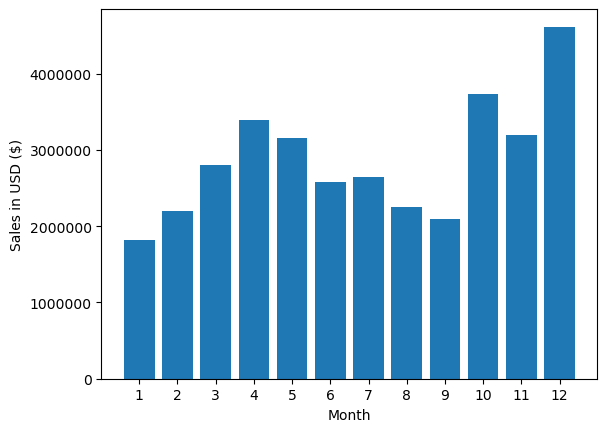

In [340]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Question 2  
**What US city had the highest number of sales?**

#### Add a city, state column

In [341]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(', ')[1] + ', ' + x.split(', ')[2].split(' ')[0])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


In [342]:
results = all_data.groupby('City').sum()

results

/var/folders/xq/7zfh37n952s9d3pvk6_mnqqc0000gn/T/ipykernel_10872/3054254465.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


['Atlanta, GA' 'Austin, TX' 'Boston, MA' 'Dallas, TX' 'Los Angeles, CA'
 'New York City, NY' 'Portland, ME' 'Portland, OR' 'San Francisco, CA'
 'Seattle, WA']


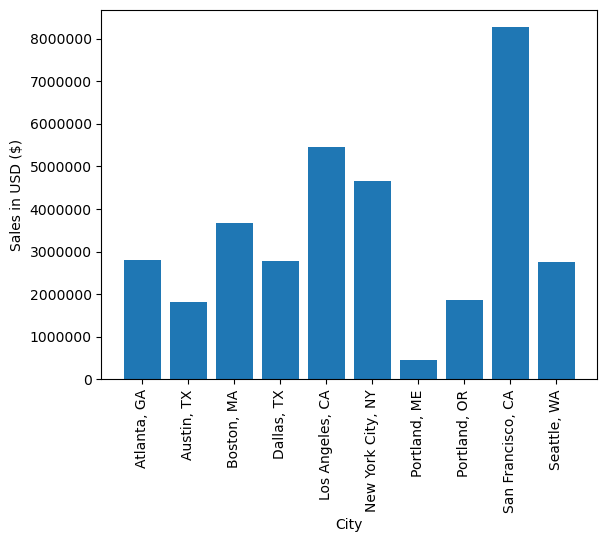

In [343]:
cities = results.index.values
print(cities)

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Question 3

**What time should we display ads to maximize the likelihood of customers buying the product?**

#### Converting the Order Date column from string to datetime

In [345]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#### Creating Hour and Minute columns

In [348]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


#### Count and plot the occurrences of orders grouped by the hour

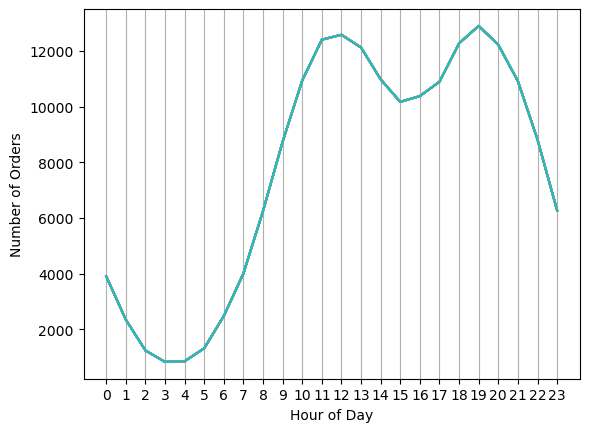

In [349]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.ylabel('Number of Orders')
plt.xlabel('Hour of Day')
plt.xticks(hours)
plt.grid(axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Question 4

**What products are most often sold together?**

In [350]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

/var/folders/xq/7zfh37n952s9d3pvk6_mnqqc0000gn/T/ipykernel_10872/2659723548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."


#### Top 10 item combinations most-frequently bought together

In [352]:
from itertools import combinations
from collections import Counter

# Count how often 2 items were bought together

count = Counter()

for row in df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

# Get the top 10 combinations of items most often bought together
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5

**What product sold the most? Why do you think it sold the most?**

In [354]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


In [368]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

/var/folders/xq/7zfh37n952s9d3pvk6_mnqqc0000gn/T/ipykernel_10872/1738041956.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

#### Plotting the top most sold products

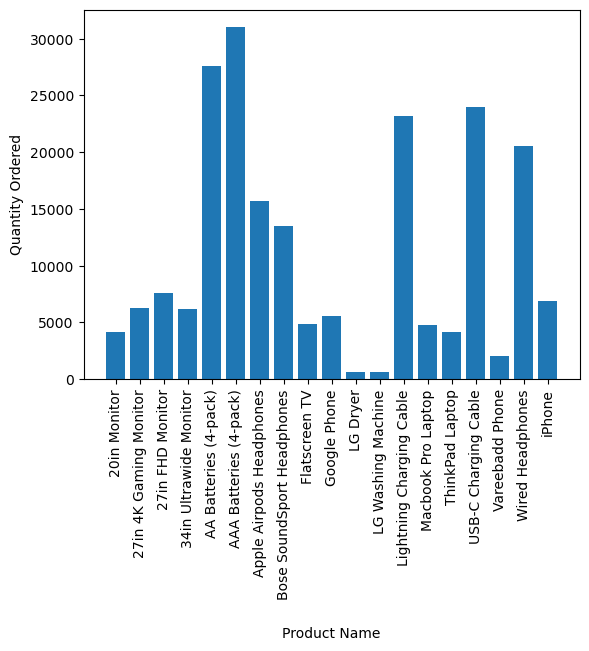

In [388]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name', labelpad=20)
plt.xticks(products, rotation='vertical')
plt.show()

In [389]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/xq/7zfh37n952s9d3pvk6_mnqqc0000gn/T/ipykernel_10872/2294271103.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


#### Overlaying price plot to determine correlation between price and quantity ordered

/var/folders/xq/7zfh37n952s9d3pvk6_mnqqc0000gn/T/ipykernel_10872/3307104601.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


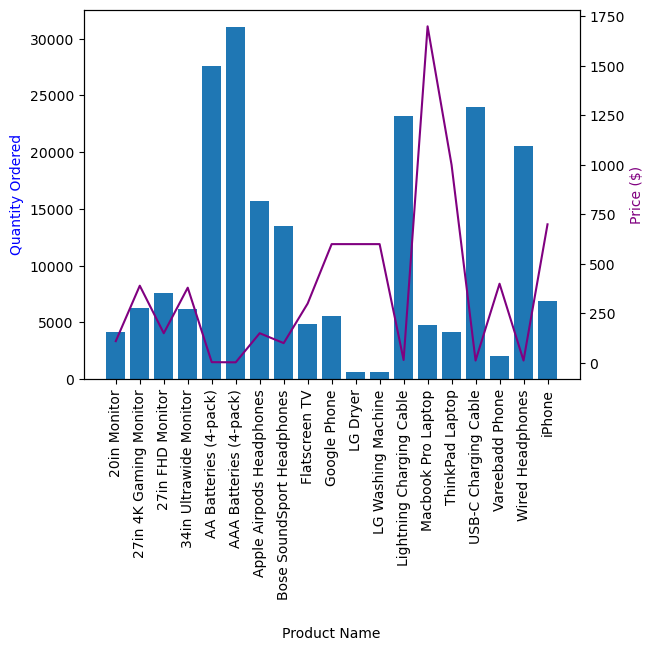

In [406]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'purple')

ax1.set_xlabel('Product Name', labelpad=20)
ax1.set_xticklabels(products, rotation='vertical')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='purple')

plt.show()